In [127]:
from dataset.celebrities import train_loader
import matplotlib.pyplot as plt
import einops

In [128]:
example = next(iter(train_loader))
image = example['image']

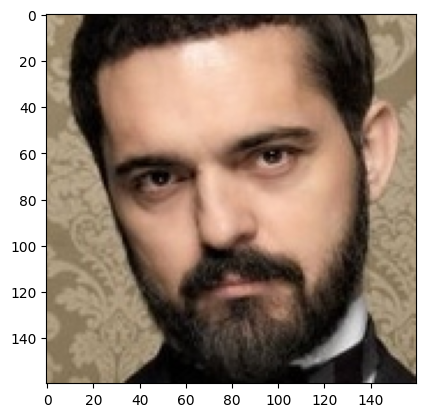

In [129]:
plt.imshow(einops.rearrange(image, '1 c h w -> h w c'))

In [130]:
image.shape

torch.Size([1, 3, 160, 160])

In [131]:
from face import align_faces, assess_quality, detect_faces

In [132]:
face_detections = detect_faces(image)

image_ok, image_message, faces_ok_and_messages, qualities = assess_quality(image, face_detections, single_face_only=False, min_confidence=0.97)
if not image_ok:
    print(image_message)
else:
    for face_image, (face_ok, face_message) in zip(align_faces(image, face_detections), faces_ok_and_messages):
        if not face_ok:
            print(face_message)
        else:
            plt.imshow(einops.rearrange(face_image, 'c h w -> h w c'))
            plt.show()
            
qualities

error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
batched_face_image = einops.rearrange(face_image, 'c h w -> 1 c h w')

In [ ]:
from resnet import feature_extractor

In [ ]:
features = feature_extractor.forward(batched_face_image)
features.shape